In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Chargement des données préparées ---
X = np.load("mfcc_clean1percent.npy")

with open("labels_clean1percent.txt", "r", encoding="utf-8") as f:
    y = [line.strip() for line in f]

# Encodage des labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# --- Reshape pour LSTM ---
# Actuellement X_train est (nb_samples, n_mfcc) --> (nb_samples, timesteps=13, features=1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"✅ Nouveaux shapes -> X_train: {X_train.shape}, X_test: {X_test.shape}")

# --- Construction du modèle LSTM ---
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_encoded)), activation='softmax')  # nb_classes = nombre de labels uniques
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# --- Entraînement ---
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# --- Évaluation ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")


✅ Nouveaux shapes -> X_train: (8256, 13, 1), X_test: (2065, 13, 1)


c:\Users\Minfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10321)          │       670,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691,921 (2.64 MB)

 Trainable params: 691,921 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.0000e+00 - loss: 9.2554 - val_accuracy: 0.0000e+00 - val_loss: 9.3494
Epoch 2/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0000e+00 - loss: 9.2015 - val_accuracy: 0.0000e+00 - val_loss: 9.5950
Epoch 3/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 4.4474e-04 - loss: 8.9792 - val_accuracy: 0.0000e+00 - val_loss: 10.0758
Epoch 4/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 7.7160e-04 - loss: 8.6397 - val_accuracy: 0.0000e+00 - val_loss: 10.9012
Epoch 5/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0015 - loss: 8.3000 - val_accuracy: 0.0000e+00 - val_loss: 11.6644
Epoch 6/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0012 - loss: 7.9526 - val_accuracy: 0.0000e+00 - val_loss: 12.4198
Epoch 7/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0017 - loss: 7.6014 - val_accuracy: 0.0000e+00 - val_loss: 12.8380
Epoch 8/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/

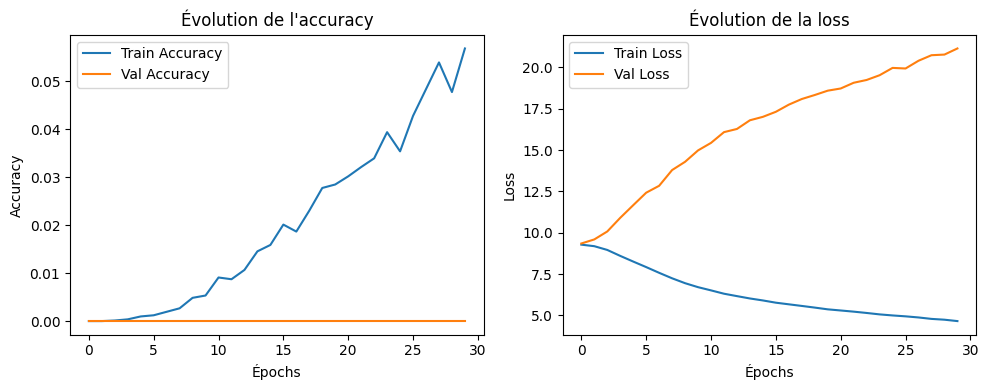

In [2]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Évolution de l'accuracy")
plt.xlabel("Épochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Évolution de la loss")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
